<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#plotData---Testes" data-toc-modified-id="plotData---Testes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>plotData - Testes</a></span></li><li><span><a href="#plotData---Oficial" data-toc-modified-id="plotData---Oficial-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>plotData - Oficial</a></span></li><li><span><a href="#Funçao-g(z)---Sigmoid" data-toc-modified-id="Funçao-g(z)---Sigmoid-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Funçao g(z) - Sigmoid</a></span></li><li><span><a href="#Cost-Function" data-toc-modified-id="Cost-Function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cost Function</a></span></li><li><span><a href="#Otimizando-via-fminuc" data-toc-modified-id="Otimizando-via-fminuc-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Otimizando via fminuc</a></span></li><li><span><a href="#plotDecisionBoundary" data-toc-modified-id="plotDecisionBoundary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>plotDecisionBoundary</a></span></li></ul></div>

Notebook criado para facilitar a execução do exercício 2 do curso de Introdução à Machine Learning. A execução em tempo real e a visualização do estado de algumas variáveis são alguns dos fatores que fazem com que o Jupyter Notebook seja extremamente útil na realização das tarefas.

In [1]:
# Lendo arquivo
data = load('ex2data1.txt');

head = data(1:10,:)

head =

   34.62366   78.02469    0.00000
   30.28671   43.89500    0.00000
   35.84741   72.90220    0.00000
   60.18260   86.30855    1.00000
   79.03274   75.34438    1.00000
   45.08328   56.31637    0.00000
   61.10666   96.51143    1.00000
   75.02475   46.55401    1.00000
   76.09879   87.42057    1.00000
   84.43282   43.53339    1.00000



Os dados acima ilustram um problema de classificação e representam, respectivamente, a nota nos dois primeiros exames de alunos e, como target, o resultado se o mesmo foi aprovado ou não na disciplina.

    - Coluna 1: Exame 1
    - Coluna 2: Exame 2
    - Coluna 3: Aprovado (1) e Reprovado (0)

In [2]:
# Organizando dataset em features e target
X = data(:, 1:2);
y = data(:, 3);

# Testando
X(1:5, :)
y(1:5, :)

ans =

   34.624   78.025
   30.287   43.895
   35.847   72.902
   60.183   86.309
   79.033   75.344

ans =

   0
   0
   0
   1
   1



## plotData - Testes

O próximo desafio é implementar uma função chamada ```plotData()``` responsável por imprimir os dados coletados em forma de gráfico.

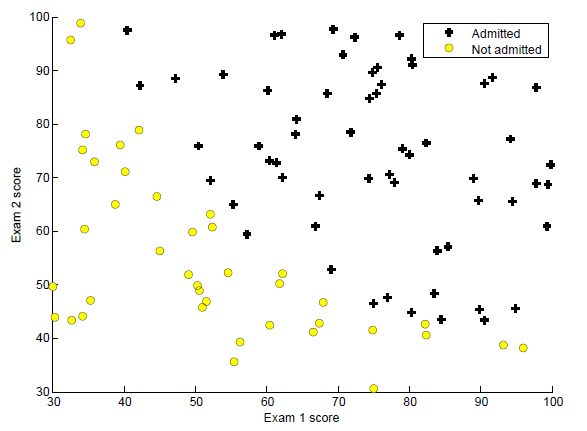

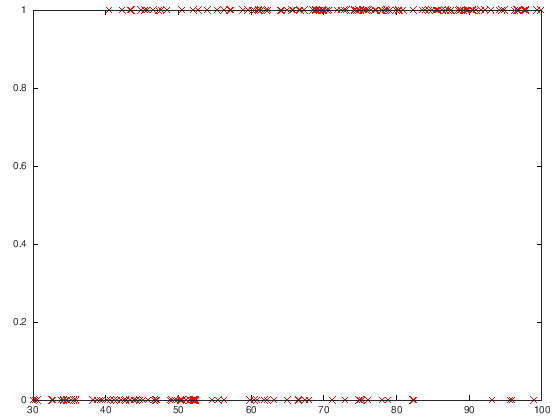

In [3]:
# Tentativas de plotagem para implementação da função plotData(X, y)
figure()
plot(X, y, 'rx')

Parece que o ideal é eximir o ```y``` da plotagem, mantendo apenas os valores em ```X```

In [4]:
help figure

'figure' is a function from the file C:\Octave\Octave-4.4.1\share\octave\4.4.1\m\plot\util\figure.m

 -- figure
 -- figure N
 -- figure (N)
 -- figure (..., "PROPERTY", VALUE, ...)
 -- H = figure (...)
     Create a new figure window for plotting.

     If no arguments are specified, a new figure with the next available
     number is created.

     If called with an integer N, and no such numbered figure exists,
     then a new figure with the specified number is created.  If the
     figure already exists then it is made visible and becomes the
     current figure for plotting.

     Multiple property-value pairs may be specified for the figure
     object, but they must appear in pairs.

     The optional return value H is a graphics handle to the created
     figure object.

     Programming Note: The full list of properties is documented at
     *note Figure Properties: Figure Properties.

     See also: axes, gcf, clf, close.

Additional help for built-in functions and operators 

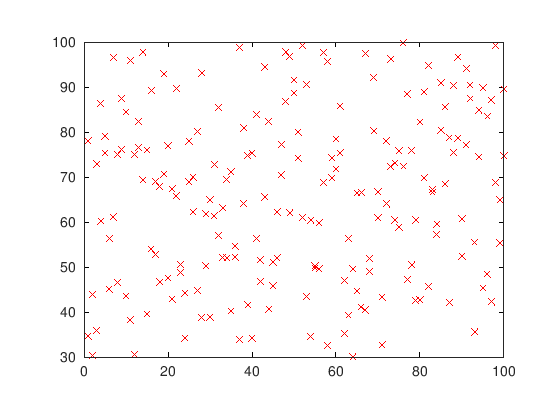

In [5]:
# Nova tentativa -> apenas dados em X e com novas configurações de plotagem
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)
plot(X, 'rx')

Está tudo junto e misturado. O ideal é separar os valores de X que são classificados como 1 dos valores que são classificados como 0.

Fonte para configuração da plotagem: https://dawes.wordpress.com/2009/12/19/nice-octave-plots/

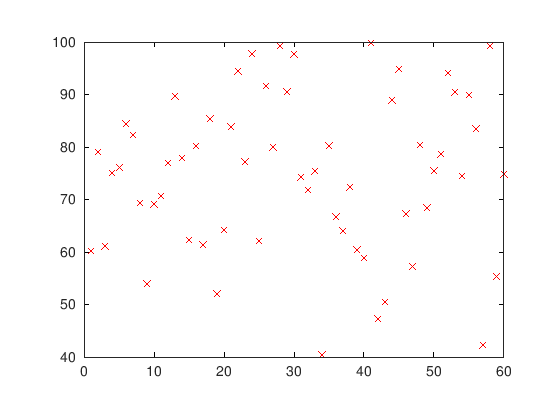

In [6]:
# Configurando plot
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)

# Slice em X
X_pass = X(y==1);
plot(X_pass, 'rx')

Parece que está ficando OK. Tentando algumas implementações adicionais.

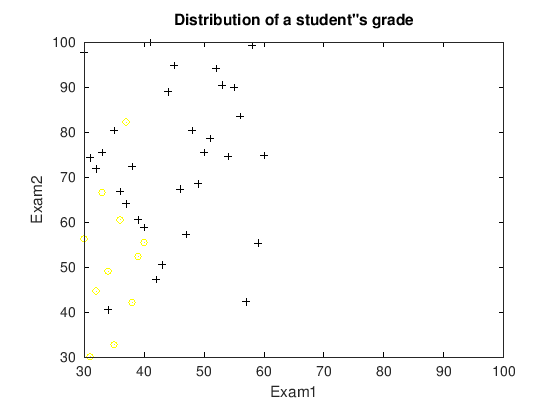

In [7]:
# Configurando plot
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)

# Slice em X
X_pass = X(y==1);
X_rec = X(y==0);

# Plotando
plot(X_pass, 'k+')
hold on;
plot(X_rec, 'yo')
ylabel('Exam2')
xlabel('Exam1')
title('Distribution of a student"s grade')
axis([30, 100, 30, 100])

Algo de errado não está certo...

In [8]:
# Será necessário utilizad a função find
help find

'find' is a built-in function from the file libinterp/corefcn/find.cc

 -- IDX = find (X)
 -- IDX = find (X, N)
 -- IDX = find (X, N, DIRECTION)
 -- [i, j] = find (...)
 -- [i, j, v] = find (...)
     Return a vector of indices of nonzero elements of a matrix, as a
     row if X is a row vector or as a column otherwise.

     To obtain a single index for each matrix element, Octave pretends
     that the columns of a matrix form one long vector (like Fortran
     arrays are stored).  For example:

          find (eye (2))
            => [ 1; 4 ]

     If two inputs are given, N indicates the maximum number of elements
     to find from the beginning of the matrix or vector.

     If three inputs are given, DIRECTION should be one of "first" or
     "last", requesting only the first or last N indices, respectively.
     However, the indices are always returned in ascending order.

     If two outputs are requested, 'find' returns the row and column
     indices of nonzero elements of a 

A função ```find(condition)``` irá retornar os índices de determinada matriz que satisfazem a condição especificada. Assim, os índices serão mantidos e não iremos correr riscos do plot ficar segregado.

In [9]:
# Aplicando find
X_pass = find(y == 1);
X_pass(1:7, :)

# Verificando diretamente no y se os índices retornados realmente são valores y=1
y(1:10)

ans =

    4
    5
    7
    8
    9
   10
   13

ans =

   0
   0
   0
   1
   1
   0
   1
   1
   1
   1



Realmente...

In [10]:
# Aplicando valores também em alunos reprovados
X_rec = find(y == 0);
X_rec(1:7)

# Verificando y (pelo exemplo acima, o retorno de X_rec deve conter 1, 2, 3, 6...)
y(1:10)

ans =

    1
    2
    3
    6
   11
   12
   15

ans =

   0
   0
   0
   1
   1
   0
   1
   1
   1
   1



Agora só nos resta implementar a plotagem.

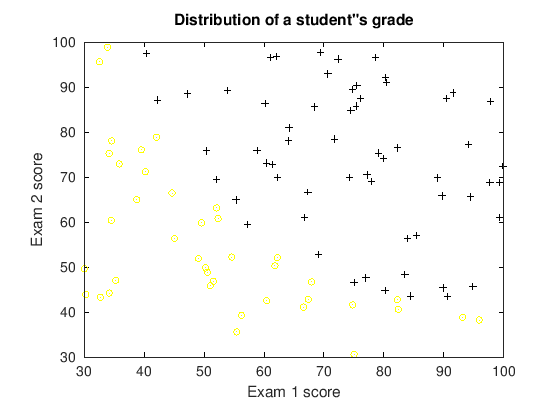

In [11]:
# Configurando plot
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)

# Slice em X
X_pass = find(y==1);
X_rec = find(y==0);

# Plotando
plot(X(X_pass, 1), X(X_pass, 2), 'k+')
hold on;
plot(X(X_rec, 1), X(X_rec, 2), 'yo')
ylabel('Exam 2 score')
xlabel('Exam 1 score')
title('Distribution of a student"s grade')

Para um melhor entendimento (houve dificuldade em entender a linha ```X(X_pass, 1)``` ), vou refazer a plotagem indexando as variáveis com um nome sugestivo.

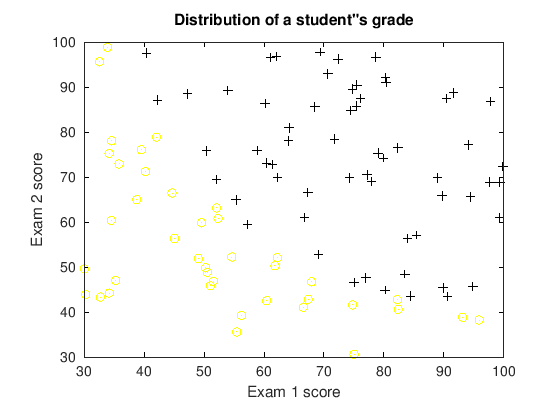

In [12]:
# Configurando plot
h = figure;
set (h,'papertype', '<custom>')
set (h,'paperunits','inches');
set (h,'papersize',[3 2.5])
set (h,'paperposition', [0,0,[3 2.5]])
set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75])
set (0,'defaultaxesfontsize', 14)

# Slice em X
X_pass = find(y==1);
X_rec = find(y==0);

X_exam1_pass = X(X_pass, 1);
X_exam2_pass = X(X_pass, 2);

X_exam1_rec = X(X_rec, 1);
X_exam2_rec = X(X_rec, 2);

# Plotando
plot(X_exam1_pass, X_exam2_pass, 'k+', 'LineWidth', 2, ...
'MarkerSize', 8)
hold on;
plot(X_exam1_rec, X_exam2_rec, 'yo', 'LineWidth', 2, ...
'MarkerSize', 8)
ylabel('Exam 2 score')
xlabel('Exam 1 score')
title('Distribution of a student"s grade')

## plotData - Oficial

In [13]:
function plotData(X, y)
    % ---------------------
    %     Description
    % ---------------------
    % Função responsável pela plotagem gráfica da distribuição das notas dos alunos (Exames 1 e 2).
    % Os valores serão distribuídos e separados de acordo com a classificação proposta em y (aprovado/reprovado)
    
    % Encontra os índices dos aprovados e dos reprovados
    X_pass = find(y==1);
    X_rec = find(y==0);
    
    % Separa os dados de aprovados e reprovados por exame
    X_pass_e1 = X(X_pass, 1);
    X_pass_e2 = X(X_pass, 2);
    X_rec_e1 = X(X_rec, 1);
    X_rec_e2 = X(X_rec, 2);
    
    % Configura plotagem
    h = figure;
    set (h,'papertype', '<custom>');
    set (h,'paperunits','inches');
    set (h,'papersize',[3 2.5]);
    set (h,'paperposition', [0,0,[3 2.5]]);
    set (h,'defaultaxesposition', [0.15, 0.15, 0.75, 0.75]);
    set (0,'defaultaxesfontsize', 14);
    
    % Plota os dados
    plot(X_pass_e1, X_pass_e2, 'k+', ...
        'MarkerSize', 7, 'LineWidth', 8)
    hold on;
    plot(X_rec_e1, X_rec_e2, 'yo', ...
        'MarkerSize', 7, 'LineWidth', 3)
    
    # Legendas e labels
    xlabel('Nota no Exame 1')
    ylabel('Nota no Exame 2')
    title('Distribuicao de Notas e Classificacao dos Estudantes')

endfunction

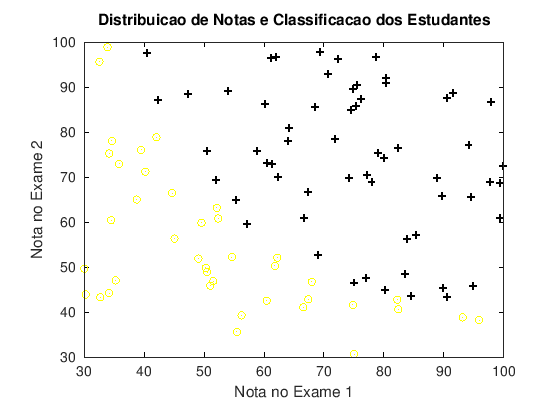

In [14]:
# Chamando a função
plotData(X, y)

## Funçao g(z) - Sigmoid

Nesta etapa da atividade, é preciso realizar o warmUpExercise que, por sua vez, contempla a criação de uma função que calcula a função ```g(z)``` sigmoidal.

In [15]:
# Realizando alguns testes
z = [1 2 3; 4 5 6];
g = zeros(size(2))

g = 0


In [16]:
# Tentando aplicar resultado à função g
g = 1 / (1 + exp(z))

error: operator /: nonconformant arguments (op1 is 1x1, op2 is 2x3)


In [17]:
# Testando com vetores
v = [1 2 3]
exp(v)

v =

   1   2   3

ans =

    2.7183    7.3891   20.0855



In [18]:
# Encontrando o jeito certo = element-wise divison
m = [1 2; 3 4]
1 ./ exp(m)

m =

   1   2
   3   4

ans =

   0.367879   0.135335
   0.049787   0.018316



In [19]:
# Aplicando à função g
z = [3; 14; 20; 2];
g = 1 ./ (1 + exp(z))

g =

   0.0474258731776
   0.0000008315280
   0.0000000020612
   0.1192029220221



Aplicando função g sigmoidal

In [20]:
function g = sigmoid(z)
    % ----------------
    %    DESCRIÇÃO
    % ----------------
    % Função responsável por calcular função g(z)
    %
    % INPUT:
    % z -> parâmetros para o cálculo de g(z), lembrando que z define theta^T * X e também pode ser um vetor ou matriz.
    %
    % OUTPUT:
    % g -> resultado a função para os parâmetros z passados.
    
    g = 1 ./ (1 + exp(-z));

endfunction

In [21]:
# Chamando a função g
z = [0, 1000000, .5, 1];
g = sigmoid(z)

g =

   0.50000   1.00000   0.62246   0.73106



## Cost Function

Bloco de instruções responsável por definir a ```Função Custo``` para regressão logística, bem como as derivadas parciais do gradiente.

In [22]:
# De maneira vetorizada
m = length(y)

m =  100


In [23]:
# Configurando termos
[m, n] = size(X)

X_train = [ones(m, 1) X];
X_train(1:5, :)

initial_theta = zeros(n + 1, 1) # theta = n+1 dimensional

m =  100
n =  2
ans =

    1.0000   34.6237   78.0247
    1.0000   30.2867   43.8950
    1.0000   35.8474   72.9022
    1.0000   60.1826   86.3086
    1.0000   79.0327   75.3444

initial_theta =

   0
   0
   0



In [24]:
# Definindo z e função g (h(x))
z = X_train * initial_theta;
z(1:5)

h = sigmoid(z);
h(1:5)

ans =

   0
   0
   0
   0
   0

ans =

   0.50000
   0.50000
   0.50000
   0.50000
   0.50000



In [25]:
# Definindo a função custo
J = (1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h))

J =  0.69315


O resultado bateu com o do exercício. Calculando agora o gradiente (derivadas parciais);

In [26]:
# Definindo o gradiente
gradient = zeros(size(initial_theta))

gradient =

   0
   0
   0



In [27]:
gradient = X_train' * (h - y) 

gradient =

    -10.000
  -1200.922
  -1126.284



In [28]:
# Colocando tudo em função
function [J, grad] = costFunction(theta, X, y)
    % ------------------
    %    DESCRIPTION
    % ------------------
    % Função responsável por calcular a função de custo J e o gradiente (Derivadas parciais)
    %
    % INPUT:
    % theta -> parâmetros theta que definem o comportamento do moelo;
    % X     -> dados de treinamento para cálculo de previsões;
    % y     -> dados target.
    %
    % OUTPUT:
    % J     -> função de custo para a hypothesis definida;
    % grad  -> gradiente da função para cada parâmetro theta (derivadas parciais).
    
    # Define o parâmetro m
    m = length(y);
    J = 0;
    grad = zeros(size(theta));
    
    # Adiciona coluna para x_0 nos dados de treinamento
    X_train = [ones(m, 1), X];
    
    # Calcula hypothesis
    z = X_train * theta;
    h = sigmoid(z);
    
    # Calcula função de custo J
    J = (1 / m) * (-y' * log(h) - (1 - y)' * log(1 - h));
    
    # Calcula gradiente para cada entrada
    grad = (X_train' * (h - y)) / m;

endfunction

In [29]:
# Inicializando parâmetros e chamando função
[m, n] = size(X);
initial_theta = zeros(n + 1, 1);

[J, grad] = costFunction(initial_theta, X, y)

J =  0.69315
grad =

   -0.10000
  -12.00922
  -11.26284



Os resultados surtiram o efeito esperado através da inicialização dos parâmetros theta como [0; 0; 0]

## Otimizando via fminuc

In [30]:
# Inicializando os parâmetros theta de modo diferente
test_theta = [-24; .2; .2]

test_theta =

  -24.00000
    0.20000
    0.20000



In [31]:
# Chamando função que calcula J e grad
[cost, gradient] = costFunction(test_theta, X, y)

cost =  0.21833
gradient =

   0.042903
   2.566234
   2.646797



In [36]:
# Verificando novamente os resultados para theta inicial
inicial_theta = zeros(size(X_train, 2), 1)
[cost, gradient] = costFunction(initial_theta, X, y)

inicial_theta =

   0
   0
   0

cost =  0.69315
gradient =

   -0.10000
  -12.00922
  -11.26284



In [38]:
# Verificando com fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options)

theta =

  -25.16127
    0.20623
    0.20147

cost =  0.20350


Absurdamente melhor.

## plotDecisionBoundary

In [44]:
help contour

'contour' is a function from the file C:\Octave\Octave-4.4.1\share\octave\4.4.1\m\plot\draw\contour.m

 -- contour (Z)
 -- contour (Z, VN)
 -- contour (X, Y, Z)
 -- contour (X, Y, Z, VN)
 -- contour (..., STYLE)
 -- contour (HAX, ...)
 -- [C, H] = contour (...)
     Create a 2-D contour plot.

     Plot level curves (contour lines) of the matrix Z, using the
     contour matrix C computed by 'contourc' from the same arguments;
     see the latter for their interpretation.

     The appearance of contour lines can be defined with a line style
     STYLE in the same manner as 'plot'.  Only line style and color are
     used; Any markers defined by STYLE are ignored.

     If the first argument HAX is an axes handle, then plot into this
     axes, rather than the current axes returned by 'gca'.

     The optional output C contains the contour levels in 'contourc'
     format.

     The optional return value H is a graphics handle to the hggroup
     comprising the contour lines.

     Exa

In [47]:
function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    %legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end

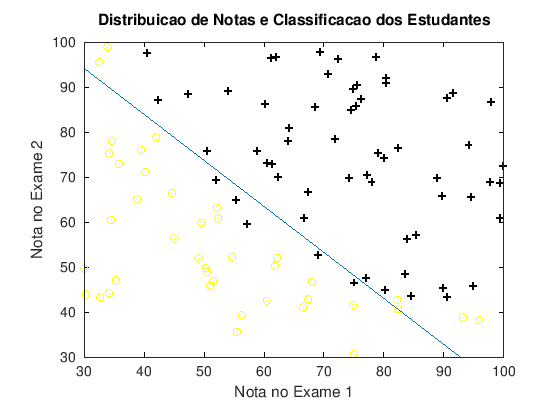

In [49]:
% Plotando resultados para otimizando por fminunc
plotDecisionBoundary(theta, X_train, y)